

Fait par: Jacob Turcotte

Fait dans le contexte de:

Biogénius
&
CCI



# Introduction

Ce document présente une simulation d'un signal PWM (Modulation de Largeur d'Impulsion) avec une amplitude variant de 0 à 3,3V. Nous utiliserons les bibliothèques SciPy, Matplotlib et NumPy pour réaliser cette simulation.

Dans la première partie, nous allons générer et visualiser le signal PWM. Ensuite, nous simulerons un filtre passe-bas RC pour observer la réponse du système à ce signal. Enfin, nous modéliserons un circuit RL pour simuler le comportement d'un moteur, mettant en évidence l'impact des composants sur le signal PWM.


## Importation des bibliothèques

Pour commencer, nous devons importer les bibliothèques nécessaires pour notre simulation. Les bibliothèques utilisées dans ce document sont :

- `scipy`: pour générer le signal PWM et effectuer les calculs nécessaires.
- `matplotlib.pyplot`: pour visualiser le signal PWM et les résultats des simulations.
- `numpy`: pour manipuler les données numériques.

In [1]:
%pip install scipy matplotlib numpy
from scipy import signal
import matplotlib.pyplot as plot
import numpy as np
import math

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Paramètres et génération du signal PWM

Dans cette section, nous allons définir les paramètres nécessaires pour la génération du signal PWM, puis nous allons créer le signal lui-même.

# Qu'est-ce que le PWM ?

Le **Modulation de Largeur d'Impulsion** (PWM, pour *Pulse Width Modulation*) est une technique de modulation qui consiste à moduler la largeur des impulsions d'un signal numérique afin de contrôler la puissance délivrée à une charge. Elle est largement utilisée dans divers domaines, notamment dans le contrôle des moteurs, l'éclairage LED, et les alimentations à découpage.

## Principes de fonctionnement

Le PWM fonctionne en alternant rapidement entre un état haut (ON) et un état bas (OFF). La proportion de temps pendant lequel le signal est à l'état haut par rapport à la période totale du signal détermine la **duty cycle** (rapport cyclique) du signal PWM.

### Paramètres clés

1. **Fréquence** : La fréquence du signal PWM détermine combien de fois par seconde le signal peut basculer entre l'état haut et l'état bas. Par exemple, une fréquence de 1 kHz signifie que le signal effectue 1000 cycles par seconde.

2. **Duty Cycle** : Le rapport cyclique est défini comme le rapport du temps où le signal est à l'état haut par rapport à la période totale du signal. Il est généralement exprimé en pourcentage. Par exemple, un duty cycle de 50% signifie que le signal est à l'état haut pendant la moitié de la période et à l'état bas pendant l'autre moitié.

   **Formule** :
   Duty Cycle = (Temps en haut / Temps total) × 100
   où "Temps en haut" est le temps pendant lequel le signal est à l'état haut et "Temps total" est la période totale du signal.

## Applications du PWM

1. **Contrôle de la vitesse des moteurs** : En ajustant le duty cycle d'un signal PWM, on peut contrôler la vitesse d'un moteur à courant continu. Un duty cycle plus élevé augmente la puissance moyenne fournie au moteur, ce qui augmente sa vitesse.

2. **Dimming des LED** : Le PWM permet de contrôler la luminosité des LED. En variant le duty cycle, on peut simuler différentes intensités lumineuses.

3. **Alimentations à découpage** : Dans les circuits d'alimentation, le PWM est utilisé pour réguler la tension de sortie en contrôlant la durée des impulsions.

## Avantages du PWM

- **Efficacité énergétique** : Le PWM est une méthode très efficace pour contrôler la puissance car il minimise les pertes d'énergie, contrairement aux méthodes analogiques comme la résistance variable.
- **Précision** : Permet un contrôle précis de la puissance et de la vitesse, rendant les systèmes plus réactifs.
- **Facilité de mise en œuvre** : Les circuits PWM sont simples à concevoir et à mettre en œuvre dans des applications électroniques.


### Paramètres de l'example

- **fréquence** : 10 000 Hz (fréquence de l'onde carrée)
- **rapport cyclique PWM** : 0,5 (0,0 à 1,0)
- **source** : 3,3 V (amplitude maximale du signal)

### Code

In [2]:
# Parameters
frequency = 10000 # Frequency of the square wave (in Hz)
pwm_duty_cycle = 0.5  # Duty cycle for PWM (0.0 to 1.0)
source = 3.3  # Max amplitude of the signal

# Time array
t = np.linspace(0, 0.01, 100000, endpoint=True)

# Generate square wave with specified frequency and duty cycle
f_PWM = (source / 2) * signal.square(2 * np.pi * frequency * t, duty=pwm_duty_cycle) + (source / 2)
f_mean = np.mean(f_PWM)



## Affichage du signal PWM

Dans cette section, nous allons visualiser le signal PWM généré. Nous allons définir la taille de la figure, les étiquettes des axes, et afficher le signal avec une ligne représentant la moyenne.

### Code

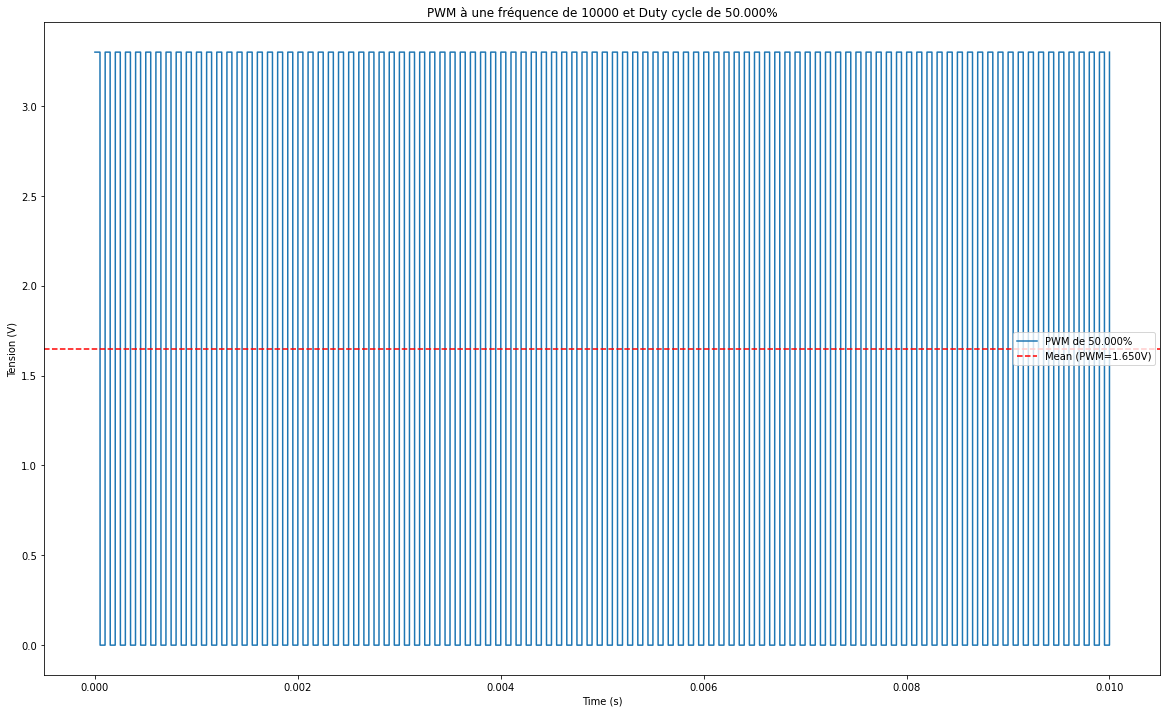

In [3]:
# Display 
# Set figure size (width, height in inches)
plot.figure(figsize=(20, 12))
# Give x,y, title axis label
plot.xlabel('Time (s)')
plot.ylabel('Tension (V)')
plot.title(f'PWM à une fréquence de {frequency} et Duty cycle de {pwm_duty_cycle*100:.3f}%')

# Plot the square wave
plot.plot(t, f_PWM, label=f'PWM de {pwm_duty_cycle*100:.3f}%')
# Plot the mean as a horizontal line
plot.axhline(y=f_mean, color='r', linestyle='--', label=f'Mean (PWM={f_mean:.3f}V)')

# Add legend
plot.legend()


plot.show()

# Paramètres du filtre passe-bas (circuit RC) et simulation de la réponse

Dans cette section, nous allons définir les paramètres nécessaires pour le filtre passe-bas RC et simuler la réponse du circuit à l'entrée du signal PWM.

### Paramètres

- **R** : 1 kΩ (résistance)
- **C** : 1 µF (capacitance)
- **tau** : constante de temps ($\tau$ = RC)
La constante de temps τ détermine la rapidité avec laquelle la tension dans le condensateur change par rapport au courant appliqué.

### Les formules
- **Xc** : Réactance capacitive (Ω) $$ X_{c} = \frac{1}{2\pi fC}$$
    - Cette équation donne la réactance du condensateur, qui est l'équivalent de la résistance d'un condensateur dans le domaine de la fréquence. Elle diminue à mesure que la fréquence augmente, ce qui signifie que le condensateur laisse mieux passer les signaux à haute fréquence.

- **fc** : Fréquence de coupure (Hz) $$ fc = \frac{1}{2\pi RC} $$
    - La fréquence de coupure est le point où le signal est atténué de 3 dB. En dessous de cette fréquence, le filtre passe-bas laisse passer la majeure partie du signal, tandis qu'au-dessus, il atténue le signal.


- **V_ripple** : Ondulation de la tension (V)  
  $$ V_{ripple} = \frac{T_{pwm}}{4 \tau} \cdot V_{source} $$  
  Cette équation définit l'ondulation de la tension dans le circuit RC. L'ondulation est fonction de la période du signal PWM (T_pwm), de la constante de temps du circuit (τ), et de la tension d'entrée (V_source).

- **t_settle** : Temps de stabilisation (s)  
  $$ t_{settle} = 5 * \tau $$  
  Le temps de stabilisation est le temps nécessaire pour que la sortie atteigne une valeur stable après l'application d'une variation du signal PWM. Il dépend de $\tau$, où 5 $\tau$ est égal à 99% de la tension finale (voir les graphiques pour voir de 1 à 5 $\tau$).

- **gain** : Gain du filtre RC (dB) $$ gain = 20 \log{10}(\frac{V_{in}}{V_{out}} )$$
    - Le gain mesure l'atténuation du signal à la sortie par rapport à l'entrée en termes de décibels. Un gain négatif signifie une atténuation, ce qui est attendu dans un filtre passe-bas à des fréquences au-delà de la fréquence de coupure.

- **Équation différentiel** : $$\frac{dV_{out}}{dt} = \frac{V_{in} - V_{out}}{\tau}$$
    - Cette équation décrit la variation temporelle de la tension de sortie 𝑉𝑜𝑢𝑡 par rapport à la tension d'entrée 𝑉𝑖𝑛. Elle capture le comportement du condensateur qui se charge ou se décharge, dépendant de la différence entre 𝑉𝑖𝑛 et 𝑉𝑜𝑢𝑡, et de la constante de temps τ.

- **Intégration avec la méthode de Euler** : $$V_{out}[i] = V_{out}[i-1] + \left(\frac{dV_{out}}{dt}\right) \cdot dt$$
    - L'intégration numérique par la méthode d'Euler permet de simuler la réponse du circuit RC au fil du temps. Cette méthode approche la solution de l'équation différentielle en ajoutant un petit incrément 𝑑𝑡 à chaque pas de temps, pour obtenir la tension de sortie suivante.


In [4]:
# Parameters for low-pass filter (RC circuit)
R = 1e3  # Resistance in ohms (e.g., 1k ohm)
C = 1e-6  # Capacitance in farads (e.g., 1uF)
tau = R * C  # Time constant (tau = RC)
Tpwm = 1/frequency #PWM period

Xc = 1/(2*np.pi*frequency*C)
Vout_one_tick = source * (Xc/np.sqrt((R*R)+(Xc*Xc)))
V_ripple = (Tpwm/(4*tau))*source
t_settle = 5*tau

fc = 1/(2*np.pi*tau)
gain = 20*np.log10(source/Vout_one_tick)

dt = t[1] - t[0]  # Time step (based on the time array)
Vout = np.zeros_like(f_PWM)  # Initialize Vout array

# Simulate RC circuit response using Euler's method
for i in range(1, len(t)):
    dVout_dt = (f_PWM[i] - Vout[i-1]) / tau  # Differential equation
    Vout[i] = Vout[i-1] + dVout_dt * dt  # Euler integration


## Affichage du signal d'entrée et de sortie

Dans cette section, nous allons afficher à la fois le signal PWM d'entrée et le signal de sortie filtré par le circuit RC. Nous allons également indiquer les valeurs de la constante de temps τ ainsi que les moyennes des signaux.

Valeur Vout pour le premier tick: 0.0525
Valeur Tau du système: 0.001
Fréquence de coupure: 159.15Hz
Gain du circuit RC: -35.96dB ou bien 1.59%
Tension de ripple: 0.083V
Time to settle voltage (pas de traducton direct en français): 0.005s


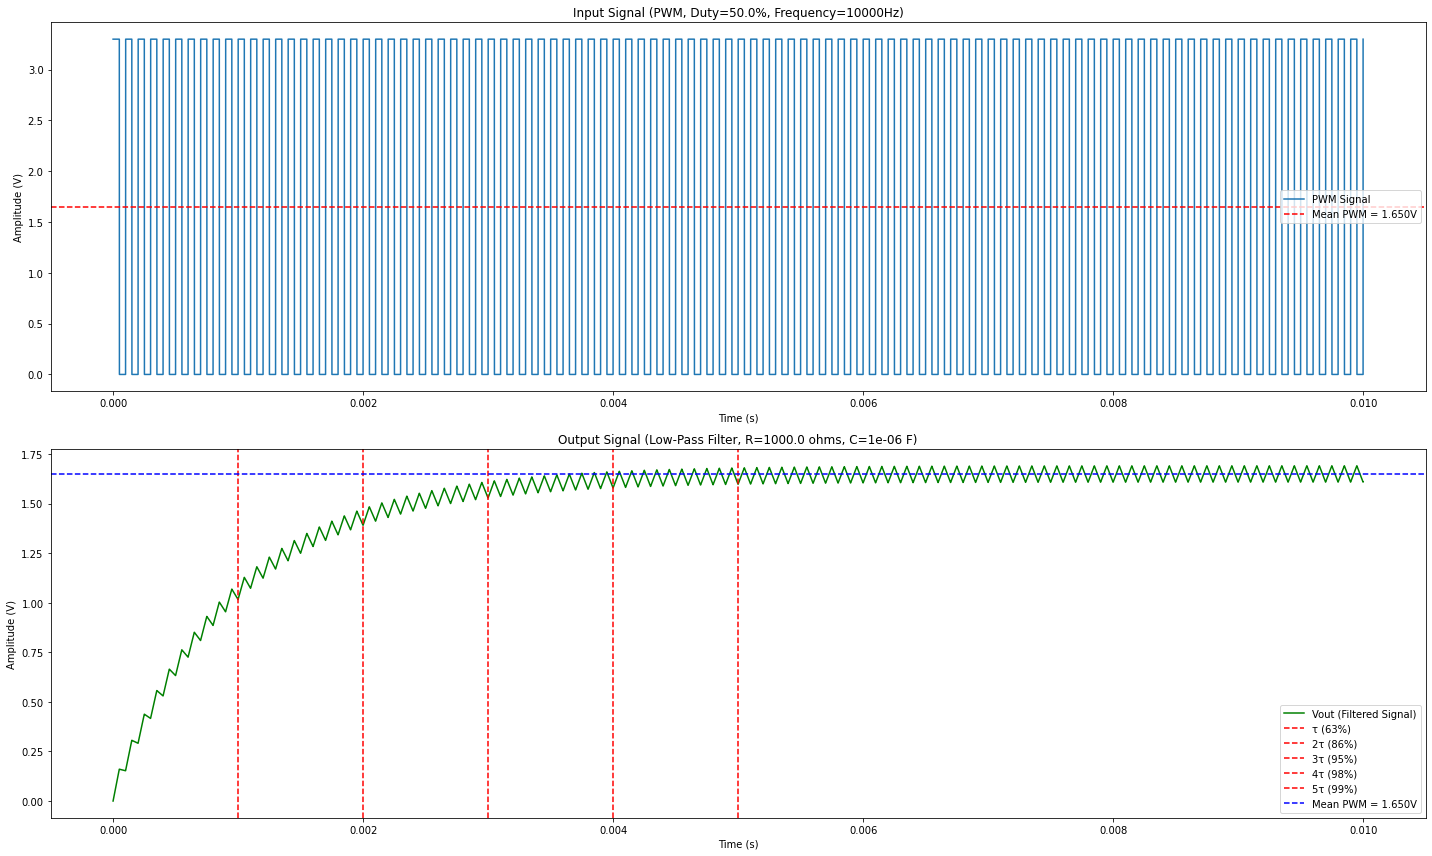

In [5]:
print("Valeur Vout pour le premier tick: "+'{:.4f}'.format(Vout_one_tick))
print(f"Valeur Tau du système: {tau}")
print(f"Fréquence de coupure: {fc:.2f}Hz")
print(f"Gain du circuit RC: -{gain:.2f}dB ou bien {(Vout_one_tick/source)*100:.2f}%")
print(f"Tension de ripple: {V_ripple:.3f}V")
print(f"Time to settle voltage (pas de traducton direct en français): {t_settle:.3f}s")
# Plotting the input (PWM) and output (filtered signal) on separate graphs
plot.figure(figsize=(20, 12))

# Plot PWM (Vin)
plot.subplot(2, 1, 1)
plot.plot(t, f_PWM, label='PWM Signal')
plot.axhline(y=np.mean(f_PWM), color='r', linestyle='--', label=f'Mean PWM = {np.mean(f_PWM):.3f}V')
plot.xlabel('Time (s)')
plot.ylabel('Amplitude (V)')
plot.title(f'Input Signal (PWM, Duty={pwm_duty_cycle*100:.1f}%, Frequency={frequency}Hz)')
plot.legend()

# Plot filtered output (Vout)
plot.subplot(2, 1, 2)
plot.plot(t, Vout, label='Vout (Filtered Signal)', color='g')
plot.axvline(x= tau, ymin=0, ymax=3.3, color='r',  linestyle='--', label='τ (63%)')
plot.axvline(x= tau*2, ymin=0, ymax=3.3, color='r',  linestyle='--', label='2τ (86%)')
plot.axvline(x= tau*3, ymin=0, ymax=3.3, color='r',  linestyle='--', label='3τ (95%)')
plot.axvline(x= tau*4, ymin=0, ymax=3.3, color='r',  linestyle='--', label='4τ (98%)')
plot.axvline(x= tau*5, ymin=0, ymax=3.3, color='r',  linestyle='--', label='5τ (99%)')
plot.axhline(y=np.mean(f_PWM), color='b', linestyle='--', label=f'Mean PWM = {np.mean(f_PWM):.3f}V')
plot.xlabel('Time (s)')
plot.ylabel('Amplitude (V)')
plot.title(f'Output Signal (Low-Pass Filter, R={R} ohms, C={C} F)')
plot.legend()

plot.tight_layout()
plot.show()

# Bounce d'un bouton électrique

Le **bounce** d'un bouton électrique désigne les rebonds ou oscillations qui surviennent lors de l'appui ou du relâchement du bouton. Lorsque les contacts métalliques internes d'un bouton se touchent ou se séparent, ils ne forment pas un contact immédiat et stable. À la place, ils rebondissent plusieurs fois en quelques millisecondes avant de se stabiliser, générant ainsi plusieurs transitions rapides entre l'état haut et l'état bas. Ce phénomène est problématique dans les circuits numériques ou les systèmes de microcontrôleurs, car ces transitions parasites peuvent être interprétées comme plusieurs appuis ou relâchements successifs du bouton, entraînant des comportements indésirables. Pour éviter ces effets, des techniques de **debouncing** (logiciel ou matériel) sont souvent utilisées afin de filtrer ou de stabiliser le signal.


In [6]:

# Parameters for the simulation
duration_bounce = 0.05  # Duration of the button press in seconds
sampling_rate_bounce = 10000  # Samples per second
t_bounce = np.linspace(0, duration_bounce, int(duration_bounce * sampling_rate_bounce))

# Simulate a clean button press (0 to 3.3V transition)
clean_press = np.full_like(t_bounce, 3.3)
clean_press[t_bounce < 0.005] = 0  # Before 5ms, the button is not pressed

# Simulate bouncing by adding noise around the transition time
bounce_time_start = 0.005  # Start of bouncing
bounce_time_end = 0.015  # End of bouncing (after stabilizing)
bounce_indices = (t_bounce >= bounce_time_start) & (t_bounce <= bounce_time_end)

# Random bouncing between 0 and 1 during the bounce period
np.random.seed(0)  # For reproducibility
bouncing = np.random.choice([0, 3.3], size=np.sum(bounce_indices))

# Create the final signal by combining the clean press with the bouncing part
button_signal = clean_press.copy()
button_signal[bounce_indices] = bouncing



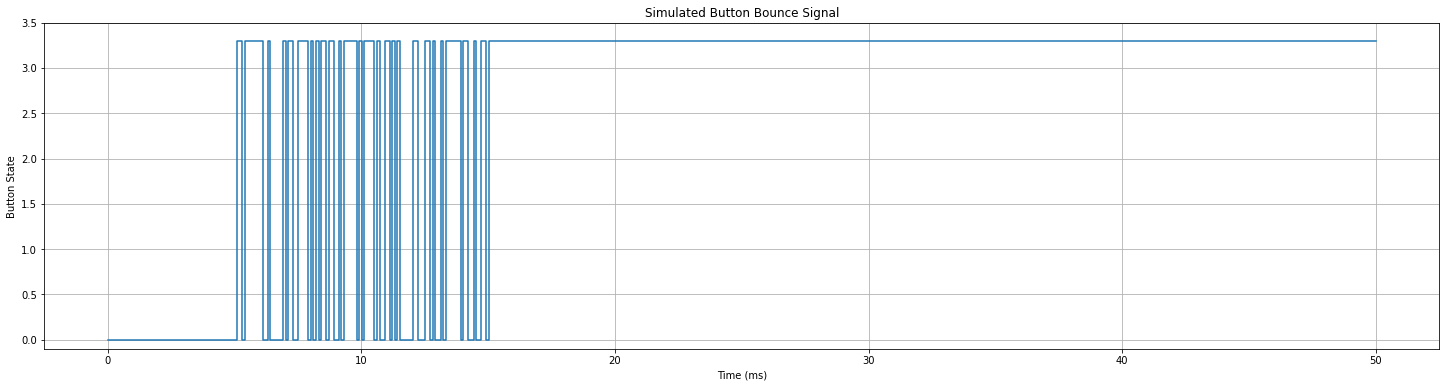

In [7]:
# Plot the signal
plot.figure(figsize=(25, 6))
plot.plot(t_bounce * 1000, button_signal, drawstyle='steps-post')  # Time in ms
plot.title('Simulated Button Bounce Signal')
plot.xlabel('Time (ms)')
plot.ylabel('Button State')
plot.grid(True)
plot.ylim([-0.1, 3.5])
plot.show()


### Debounce matériel (analogique)

Un **debounce matériel** consiste à utiliser un circuit analogique pour éliminer les rebonds d'un bouton électrique avant que le signal n'atteigne le circuit numérique. Une méthode courante pour cela est l'utilisation d'un **filtre RC** (résistance-capacité). Ce filtre agit comme un passe-bas, en lissant les transitions rapides du signal provenant du bouton. Lorsqu'un bouton est pressé, le condensateur du circuit se charge lentement en fonction de la constante de temps du réseau RC (déterminée par la résistance et la capacité). Ce processus empêche les variations rapides (causées par les rebonds) d'affecter directement le signal final. Une fois que le condensateur est chargé ou déchargé, le signal est stabilisé, ce qui élimine efficacement les oscillations indésirables. Ce signal est ensuite souvent traité par un **comparateur de tension** ou un **trigger de Schmitt** pour garantir une transition nette et fiable entre l'état haut et l'état bas.


In [8]:
# Parameters for low-pass filter (RC circuit)
R = 1e3  # Resistance in ohms (e.g., 10k ohm)
C = 1e-6  # Capacitance in farads (e.g., 0.1uF)
tau = R*C

fc = 1/(2*np.pi*tau)
dt = t_bounce[1] - t_bounce[0]  # Time step (based on the time array)
Vout = np.zeros_like(button_signal)  # Initialize Vout array

# Simulate RC circuit response using Euler's method
for i in range(1, len(t_bounce)):
    dVout_dt = (button_signal[i] - Vout[i-1]) / tau  # Differential equation
    Vout[i] = Vout[i-1] + dVout_dt * dt  # Euler integration

Valeur Tau du système: 0.001
Fréquence de coupure: 159.15Hz


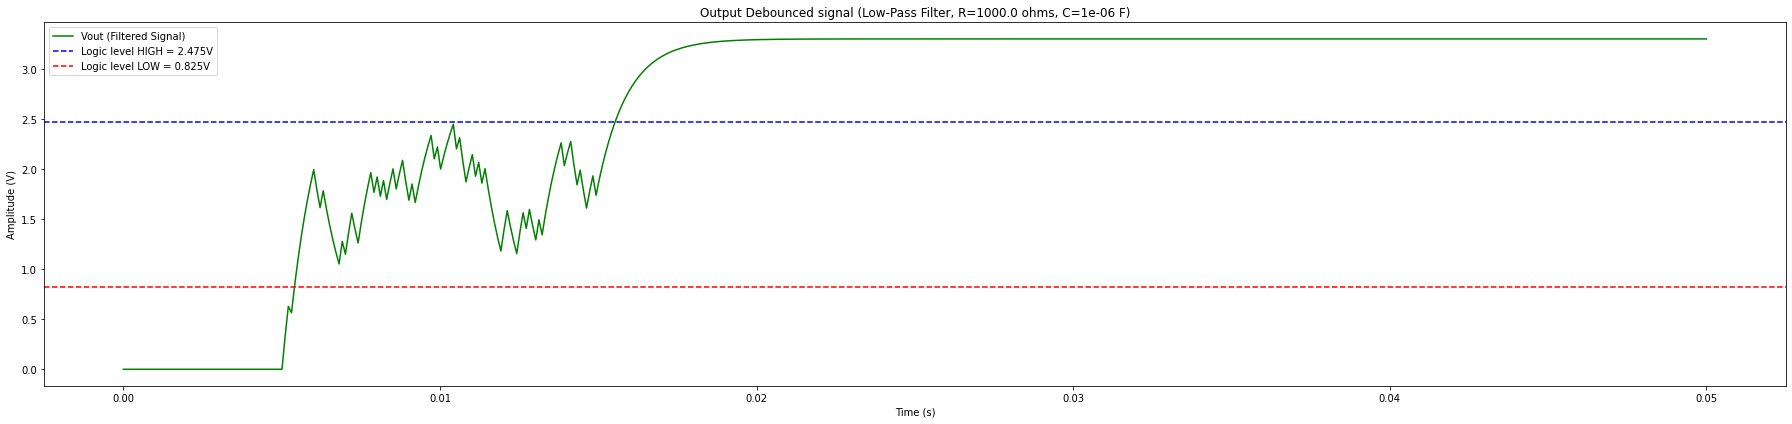

In [9]:
print(f"Valeur Tau du système: {tau}")
print(f"Fréquence de coupure: {fc:.2f}Hz")
plot.figure(figsize=(25, 6))
plot.plot(t_bounce, Vout, label='Vout (Filtered Signal)', color='g')

plot.axhline(y=source*0.75, color='b', linestyle='--', label=f'Logic level HIGH = {source*0.75:.3f}V')
plot.axhline(y=source*0.25, color='r', linestyle='--', label=f'Logic level LOW = {source*0.25:.3f}V')
plot.xlabel('Time (s)')
plot.ylabel('Amplitude (V)')
plot.title(f'Output Debounced signal (Low-Pass Filter, R={R} ohms, C={C} F)')
plot.legend()

plot.tight_layout()
plot.show()

### Debounce logiciel

Le **debounce logiciel** est une méthode qui consiste à traiter les rebonds d'un bouton électrique au niveau du code, en filtrant les transitions rapides indésirables. Cela se fait en introduisant une temporisation après la détection d'une transition du signal (appui ou relâchement du bouton). Lorsqu'une transition est détectée, le système ignore les changements supplémentaires du signal pendant une durée déterminée (généralement quelques millisecondes), le temps que les rebonds cessent. Il existe plusieurs approches pour implémenter un debounce logiciel, notamment :

- **Temporisation fixe** : après chaque changement d'état du bouton, un délai est ajouté pour ignorer toute autre transition avant la fin de ce délai.
- **Comptage stable** : le système surveille le bouton sur plusieurs cycles, et l'état n'est considéré comme stable que lorsque la même valeur est détectée plusieurs fois consécutives.
  
Le debounce logiciel est flexible et peut être ajusté en fonction des caractéristiques du bouton et des exigences de l'application, mais il nécessite généralement l'utilisation de temporisations (avec des timers ou des boucles d'attente) pour fonctionner efficacement.


# **CONTENU EXTRA NON NÉCESSAIRE À L'EXERCICE**
## Paramètres du circuit RL et simulation de la réponse

Dans cette section, nous allons définir les paramètres nécessaires pour le circuit RL et simuler la réponse du circuit à l'entrée du signal PWM.

### Paramètres

- **R** : 100 Ω (résistance)
- **L** : 0,1 H (inductance)
- **τ** : constante de temps (τ = L/R)

La constante de temps τ détermine la rapidité avec laquelle le courant dans l'inducteur change par rapport à la tension appliquée.

### Les Formules

- **V_L** : Tension aux bornes de l'inductance (V) $$ V_L = L \frac{dI}{dt} $$
  - Cette équation décrit la relation entre la tension aux bornes de l'inductance V_L et le taux de changement du courant I dans le circuit. Une augmentation rapide du courant entraîne une tension plus élevée à travers l'inductance, tandis qu'une diminution rapide produit une tension négative.

- **τ** : Constante de temps (s) $$ \tau = \frac{L}{R} $$
  - La constante de temps τ indique combien de temps il faut au circuit pour atteindre environ 63,2 % de sa valeur finale après une variation de la tension d'entrée. Une τ plus grande signifie une réponse plus lente du circuit à des changements dans le signal d'entrée.

- **Équation différentielle** : $$ \frac{dI_{out}}{dt} = \frac{V_{in} - RI_{out}}{L} $$
  - Cette équation décrit la variation temporelle du courant de sortie I_{out} en fonction de la tension d'entrée V_{in} et de la résistance R. Elle illustre comment le courant change en fonction de la différence entre la tension d'entrée et la tension due à la chute de tension sur la résistance.

- **Intégration avec la méthode d'Euler** :  $$ I_{out}[i] = I_{out}[i-1] + \left(\frac{dI_{out}}{dt}\right) \cdot dt $$
  - L'intégration numérique par la méthode d'Euler permet de simuler la réponse du circuit RL au fil du temps. Cette méthode calcule la valeur du courant de sortie pour chaque pas de temps dt en ajoutant le produit de la dérivée dI_{out}/dt et du pas de temps à la valeur précédente du courant.

### Code

In [10]:
# Parameters for the RL circuit
R = 100  # Resistance in ohms
L = 0.1  # Inductance in henries
tau = L / R  # Time constant (L/R)
dt = t[1] - t[0]  # Time step (based on the time array)
Iout = np.zeros_like(f_PWM)  # Initialize Iout (current) array

# Simulate RL circuit response using Euler's method
for i in range(1, len(t)):
    dIout_dt = (f_PWM[i] - R * Iout[i-1]) / L  # Differential equation for RL circuit
    Iout[i] = Iout[i-1] + dIout_dt * dt  # Euler integration

## Affichage du signal d'entrée et de courant dans le circuit RL

Dans cette section, nous allons afficher à la fois le signal PWM d'entrée et le courant de sortie à travers l'inducteur dans le circuit RL. Nous allons également indiquer les valeurs de la constante de temps τ ainsi que les moyennes des signaux.


Valeur Tau du système: 0.001


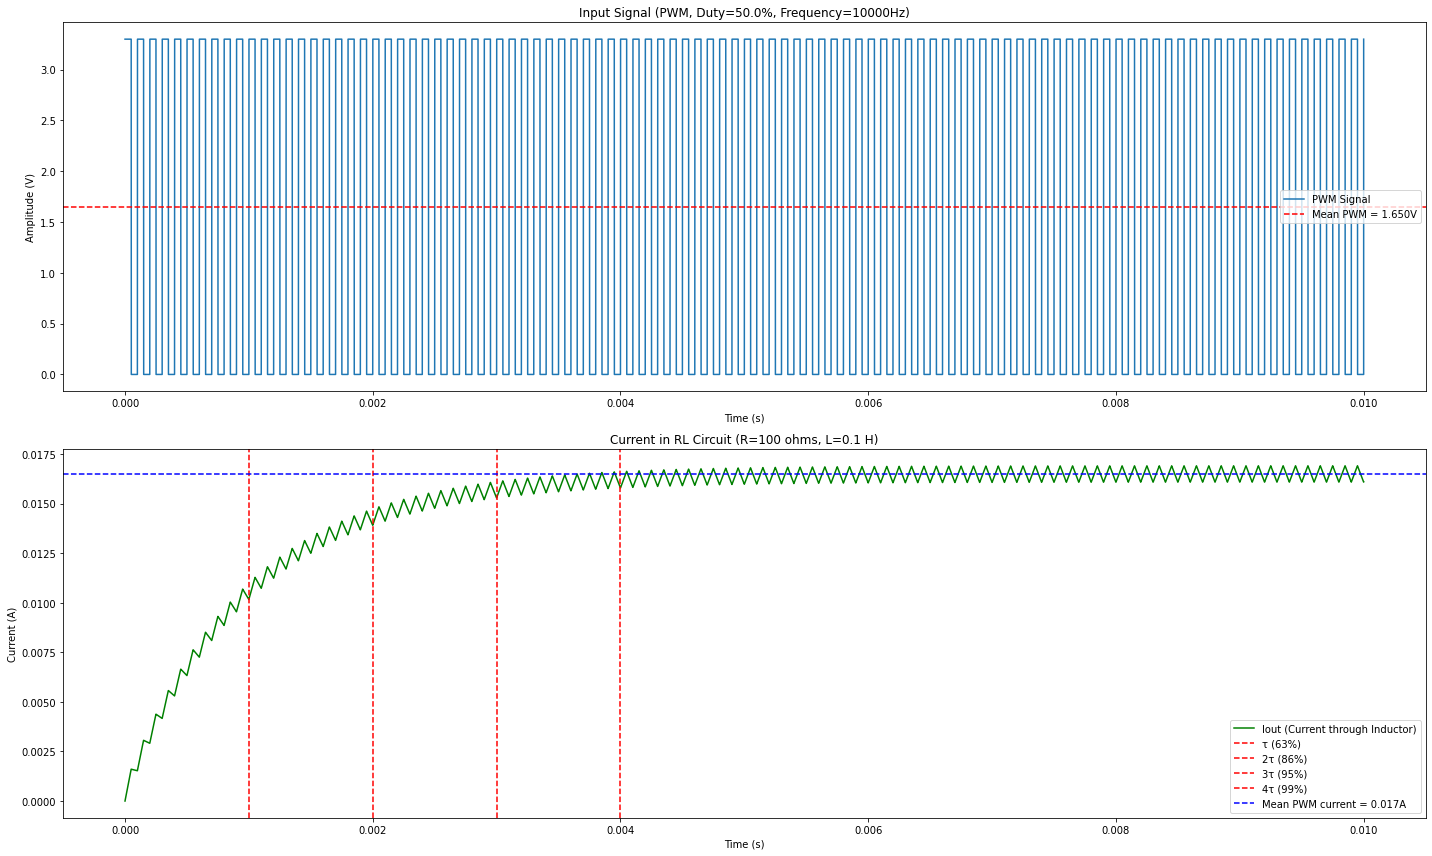

In [11]:
print(f"Valeur Tau du système: {tau}")
# Plotting the input (PWM) and output (filtered signal) on separate graphs
plot.figure(figsize=(20, 12))

# Plot PWM (Vin)
plot.subplot(2, 1, 1)
plot.plot(t, f_PWM, label='PWM Signal')
plot.axhline(y=np.mean(f_PWM), color='r', linestyle='--', label=f'Mean PWM = {np.mean(f_PWM):.3f}V')
plot.xlabel('Time (s)')
plot.ylabel('Amplitude (V)')
plot.title(f'Input Signal (PWM, Duty={pwm_duty_cycle*100:.1f}%, Frequency={frequency}Hz)')
plot.legend()

# Plot filtered output (Vout)
plot.subplot(2, 1, 2)
plot.plot(t, Iout, label='Iout (Current through Inductor)', color='g')
plot.axvline(x= tau, ymin=0, ymax=3.3, color='r',  linestyle='--', label='τ (63%)')
plot.axvline(x= tau*2, ymin=0, ymax=3.3, color='r',  linestyle='--', label='2τ (86%)')
plot.axvline(x= tau*3, ymin=0, ymax=3.3, color='r',  linestyle='--', label='3τ (95%)')
plot.axvline(x= tau*4, ymin=0, ymax=3.3, color='r',  linestyle='--', label='4τ (99%)')
plot.axhline(y=np.mean(f_PWM/R), color='b', linestyle='--', label=f'Mean PWM current = {np.mean(f_PWM/R):.3f}A')
plot.xlabel('Time (s)')
plot.ylabel('Current (A)')
plot.title(f'Current in RL Circuit (R={R} ohms, L={L} H)')
plot.legend()

plot.tight_layout()
plot.show()

SIN WAVE WITH PWM

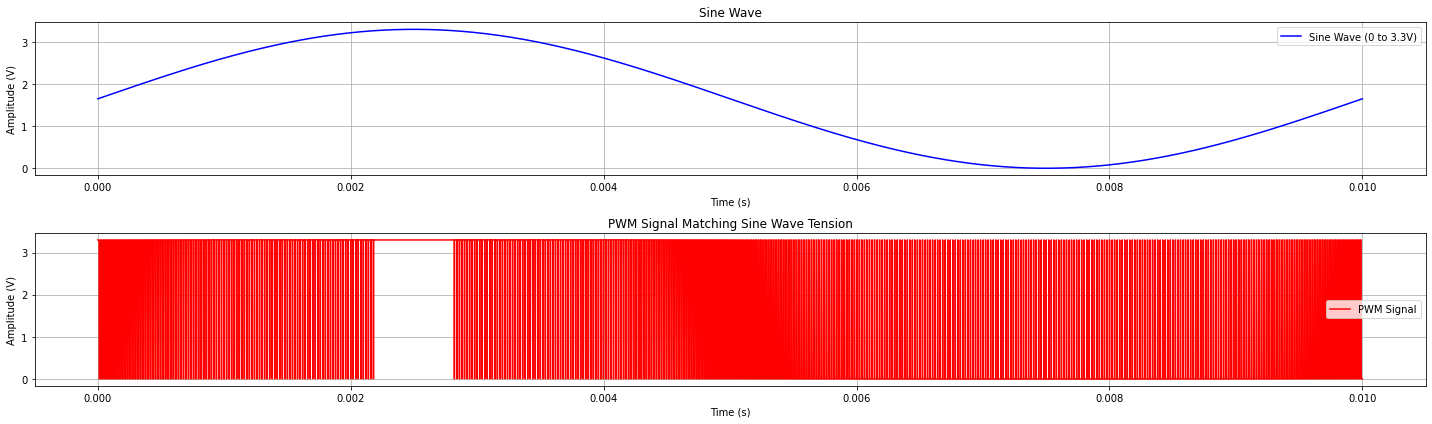

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
frequency = 100  # Frequency of the square wave (in Hz)
pwm_frequency = 500  # Frequency of the PWM signal (in Hz)
source = 3.3  # Max amplitude of the signal
sampling_rate = 50000  # Sampling rate in Hz

# Time array
t = np.linspace(0, 0.01, sampling_rate, endpoint=True)

# Generate sine wave
sig = (source / 2) * (np.sin(2 * np.pi * frequency * t) + 1)  # Normalize sine wave to [0, source]

# Calculate PWM duty cycle based on sine wave values
pwm_duty_cycle = sig / source  # Duty cycle normalized to [0, 1]

# Generate PWM signal
pwm_signal = np.zeros_like(t)

# Create the PWM signal
for i in range(len(t)):
    if i % (sampling_rate // pwm_frequency) < (sampling_rate // pwm_frequency) * pwm_duty_cycle[i]:
        pwm_signal[i] = source  # Set to source voltage for high
    else:
        pwm_signal[i] = 0  # Set to 0 for low

# Plotting
plt.figure(figsize=(20, 6))

# Plot sine wave
plt.subplot(2, 1, 1)
plt.plot(t, sig, label='Sine Wave (0 to 3.3V)', color='blue')
plt.title('Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid()
plt.legend()

# Plot PWM signal
plt.subplot(2, 1, 2)
plt.plot(t, pwm_signal, label='PWM Signal', color='red')
plt.title('PWM Signal Matching Sine Wave Tension')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Utilisation d'un circuit RC passe-bas pour générer un signal sinusoïdal à partir d'un signal PWM

## Introduction

Un circuit RC passe-bas peut être utilisé pour lisser un signal **PWM** (Pulse Width Modulation) afin de produire un signal analogue proche d'une sinusoïde. Cette technique est souvent employée pour générer des formes d'onde sinusoïdales lorsque seules des signaux numériques (tels que PWM) sont disponibles.

### Schéma du montage

Le schéma d'un simple filtre RC passe-bas est composé d'une résistance \( R \) et d'un condensateur \( C \) connectés en série. Le signal PWM est appliqué à l'entrée du filtre, et le signal lissé est récupéré en sortie du condensateur.

$$
f_c = \frac{1}{2 \pi RC}
$$

où :
- f_c est la fréquence de coupure du filtre,
- R est la résistance,
- C est la capacité.

### Fonctionnement

Le signal PWM est un signal carré, où le rapport cyclique (le rapport entre la durée de l'état haut et la période totale) est modulé pour approcher une sinusoïde. Le filtre RC passe-bas permet d'atténuer les harmoniques hautes fréquences du signal PWM, ne laissant passer que les composantes basses fréquences, qui peuvent approcher une forme sinusoïdale si le PWM est suffisamment rapide et bien modulé.

### Génération d'un signal sinusoïdal

1. **Modulation du PWM** : Pour générer un signal sinusoïdal, il est possible de moduler le rapport cyclique du signal PWM en fonction de la fonction sinusoïdale désirée. Par exemple, le rapport cyclique pourrait être calculé à chaque période de PWM selon la formule suivante :

   $$
   Duty\_Cycle(t) = \frac{V_{max}}{2} \left(1 + \sin(2\pi f t)\right)
   $$

   où :
   - V_max est l'amplitude maximale du signal PWM,
   - f est la fréquence du signal sinusoïdal souhaité,
   - t est le temps.

2. **Filtrage du signal** : Une fois le signal PWM généré, le filtre RC passe-bas atténue les composantes haute fréquence du signal carré et laisse passer les basses fréquences, produisant ainsi un signal lissé qui s'approche d'une sinusoïde.

## Désavantages

### 1. **Fréquence de coupure**

La fréquence de coupure \( f_c \) du filtre RC détermine quelles fréquences sont atténuées. Elle doit être choisie de façon à filtrer efficacement les harmoniques indésirables du signal PWM tout en laissant passer la fréquence fondamentale de la sinusoïde. Si la fréquence de coupure est trop basse, le signal peut être trop atténué et déformé. Si elle est trop élevée, le signal PWM ne sera pas suffisamment lissé.

### 2. **Décalage de phase**

Le filtre RC introduit un décalage de phase, en particulier près de la fréquence de coupure. Ce décalage de phase peut provoquer un retard entre le signal PWM d'entrée et le signal sinusoïdal de sortie, dégradant la précision du signal généré. Le décalage de phase est donné par :

$$
\phi(f) = -\tan^{-1}(2 \pi f RC)
$$

où phi est l'angle de phase en fonction de la fréquence f.

### 3. **Amplitude non idéale**

La sortie du filtre RC ne reproduit pas parfaitement l'amplitude de la sinusoïde souhaitée. Plus la fréquence du signal sinusoïdal approche de la fréquence de coupure, plus l'amplitude est atténuée. Il est donc nécessaire de compenser cette atténuation pour obtenir une forme d'onde d'amplitude correcte.

### 4. **Limites en haute fréquence**

Pour des signaux sinusoïdaux à haute fréquence, le filtre RC peut ne pas être assez performant pour lisser efficacement le signal PWM, surtout si la fréquence du PWM n'est pas suffisamment supérieure à celle du signal sinusoïdal désiré.

## Conclusion

L'utilisation d'un filtre RC passe-bas est une méthode simple pour générer un signal sinusoïdal à partir d'un signal PWM. Cependant, la fréquence de coupure du filtre et le décalage de phase introduit par celui-ci limitent la précision et la fidélité du signal généré, notamment pour les signaux à haute fréquence ou lorsque l'amplitude doit être précise.

In [13]:
# Parameters for low-pass filter (RC circuit)
R = 1e3  # Resistance in ohms (e.g., 1k ohm)
C = 1e-6  # Capacitance in farads (e.g., 1uF)
tau = R * C  # Time constant (tau = RC)

Xc = 1/(2*np.pi*frequency*C)
Vout_one_tick = source * (Xc/np.sqrt((R*R)+(Xc*Xc)))

fc = 1/(2*np.pi*tau)
gain = 20*np.log10(source/Vout_one_tick)
phase_shift = -np.arctan(2*np.pi*frequency*tau)

dt = t[1] - t[0]  # Time step (based on the time array)
Vout = np.zeros_like(pwm_signal)  # Initialize Vout array

# Simulate RC circuit response using Euler's method
for i in range(1, len(t)):
    dVout_dt = (pwm_signal[i] - Vout[i-1]) / tau  # Differential equation
    Vout[i] = Vout[i-1] + dVout_dt * dt  # Euler integration

Valeur Tau du système: 0.001
Fréquence de coupure: 159.15Hz
Gain du circuit RC: -1.45dB ou bien 84.67%
Décalage de phase: -0.56rad ou bien -32.14deg


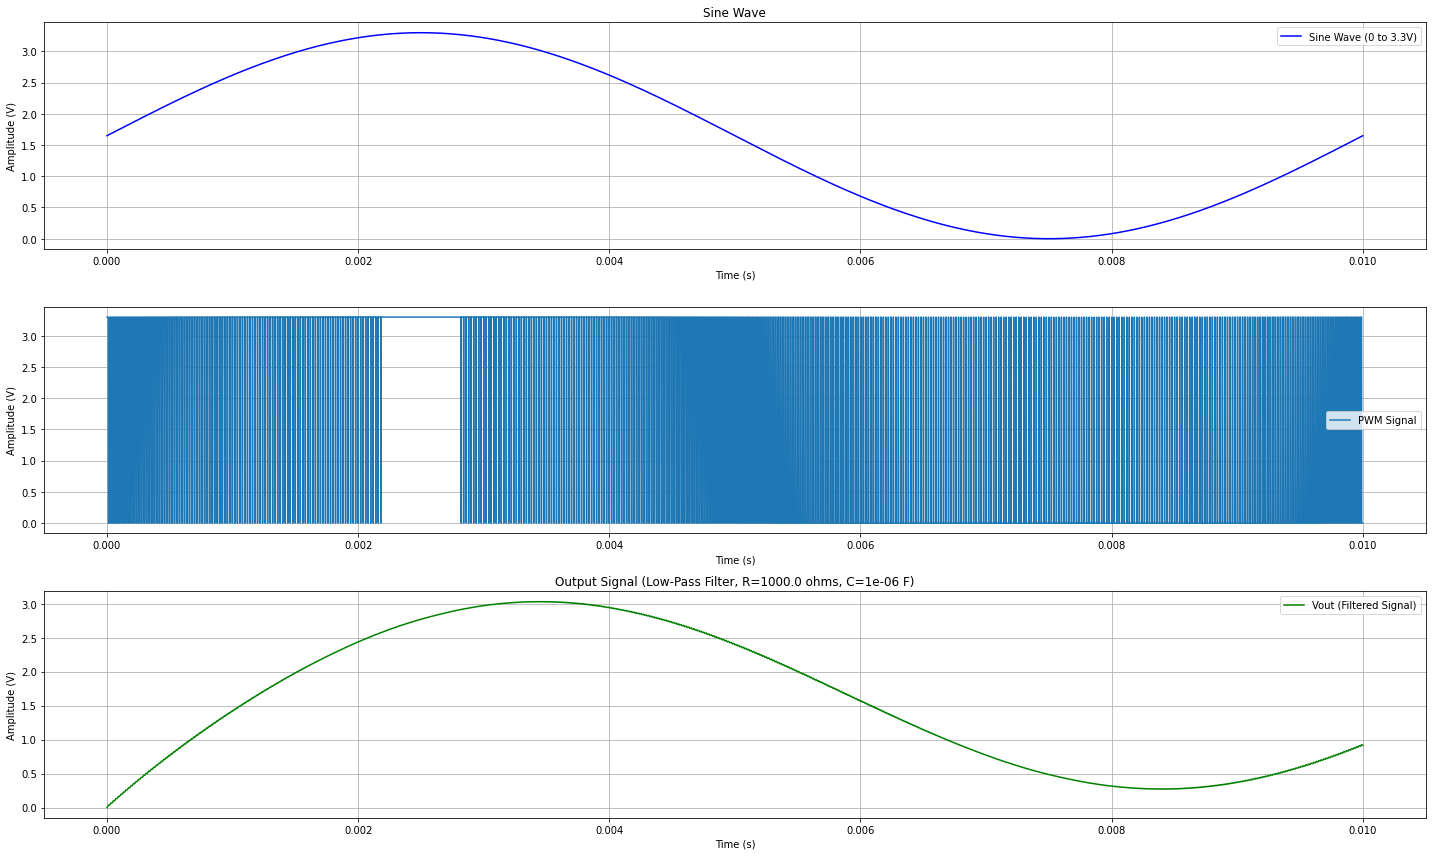

In [14]:
print(f"Valeur Tau du système: {tau}")
print(f"Fréquence de coupure: {fc:.2f}Hz")
print(f"Gain du circuit RC: -{gain:.2f}dB ou bien {(Vout_one_tick/source)*100:.2f}%")
print(f"Décalage de phase: {phase_shift:.2f}rad ou bien {np.degrees(phase_shift):.2f}deg")
# Plotting the input (PWM) and output (filtered signal) on separate graphs
plot.figure(figsize=(20, 12))

# Plot PWM (Vin)
plot.subplot(3, 1, 2)
plot.plot(t, pwm_signal, label='PWM Signal')
plot.xlabel('Time (s)')
plot.ylabel('Amplitude (V)')
#plot.title(f'Input Signal (PWM, Duty={pwm_duty_cycle*100:.1f}%, Frequency={frequency}Hz)')
plt.grid()
plot.legend()

# Plot filtered output (Vout)
plot.subplot(3, 1, 3)
plot.plot(t, Vout, label='Vout (Filtered Signal)', color='g')
plot.xlabel('Time (s)')
plot.ylabel('Amplitude (V)')
plot.title(f'Output Signal (Low-Pass Filter, R={R} ohms, C={C} F)')
plt.grid()
plot.legend()

# Plot sine wave
plt.subplot(3, 1, 1)
plt.plot(t, sig, label='Sine Wave (0 to 3.3V)', color='blue')
plt.title('Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid()
plt.legend()

plot.tight_layout()
plot.show()